# Boom Bike Sharing Demand

## Importing  Libraries

In [1]:
# Import filterwarnings to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Step 1: Reading and Understanding the Data

In [4]:
# Reading the bikes rental  dataset into 'bikes' dataframe

bikes=pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# looking at the shape of the bikes dataset
bikes.shape

(730, 16)

In [6]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Finding out the datatype of the columns in the bikes dataset:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## In our bikes dataset , we have the following types of columns:
### -Categorical columns: season , month , weathersit , weekday
### -Continuous/Numerical columns : windspeed , hum , temp , atemp , count
### -Binary/Dichotomous columns: yr , holiday , workingday
#### In our bikes dataset,we have some unnecessary columns like: instant , dteday , casual , registered , so we are going to drop these columns.

In [8]:
#Let's convert the datatype of dteday column to datetime.
bikes['dteday'] =  pd.to_datetime(bikes['dteday'],format='%d-%m-%Y')
bikes['dteday'].dtype

dtype('<M8[ns]')

In [9]:
#Extracting the Year and Month from the Date
bikes['year'] = pd.DatetimeIndex(bikes['dteday']).year
bikes['month'] = pd.DatetimeIndex(bikes['dteday']).month

In [10]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [11]:
# Dropping the columns as we have extracte#d the correct year and month from the date.

bikes.drop(['yr','mnth'],axis=1,inplace=True)

In [12]:
bikes.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [13]:
#Dropping the redundant variable holiday as the workingday column covers enough information that is required.

bikes.drop('holiday',axis=1,inplace=True)

In [14]:
bikes.head()

,instant,dteday,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [15]:
# Dropping the dteday,instant,casual and registered columns.

bikes.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [16]:
bikes.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [17]:
# Renaming some columns for better understanding

bikes.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)

In [18]:
bikes.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


# Step 2: Encoding the Labels & Visualization
### Mapping the Categorical columns to their actual category names :
#### 1 . Season column mapping as:
##### 1: spring
##### 2: summer
##### 3: fall
##### 4: winter

In [19]:
# Mapping the categorical column : season into its categories

codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bikes['season'] = bikes['season'].map(codes)

<AxesSubplot:xlabel='season', ylabel='count'>

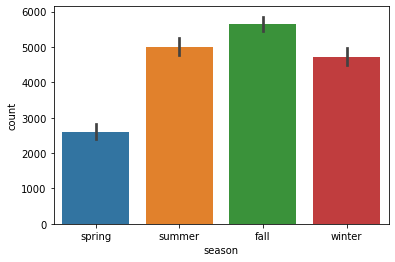

In [20]:
sns.barplot('season','count',data=bikes)

## 2. Weathersit column mapping as:
#### 1: clear
#### 2: mist & cloudy
#### 3: light rain & snow
#### 4: heavy rain & snow

In [21]:
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bikes['weathersit'] = bikes['weathersit'].map(codes)

<AxesSubplot:xlabel='weathersit', ylabel='count'>

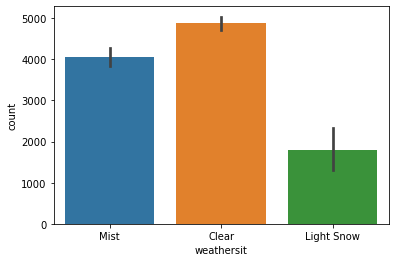

In [22]:
sns.barplot('weathersit','count',data=bikes)

### 3.workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

In [23]:
codes = {1:'working_day',0:'Holiday'}
bikes['workingday'] = bikes['workingday'].map(codes)

<AxesSubplot:xlabel='workingday', ylabel='count'>

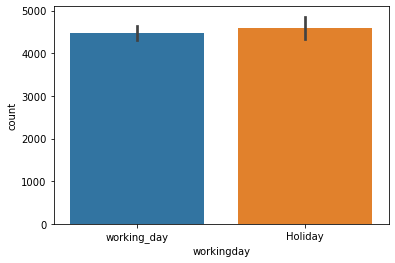

In [24]:
sns.barplot('workingday','count',data=bikes)

### 4.Year column mapping as:
#### 0: 2018
#### 1: 2019

In [25]:
codes = {2019:1,2018:0}
bikes['year'] = bikes['year'].map(codes)

<AxesSubplot:xlabel='year', ylabel='count'>

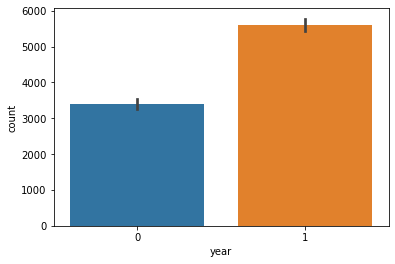

In [26]:
sns.barplot('year','count',data=bikes)

### 5.Month column mapping as:
#### 1: Jan , 2: Feb , 3: Mar , 4: Apr , 5: May , 6: Jun , 7: Jul , 8: Aug , 9: Sep , 10: Oct , 11: Nov , 12: Dec


In [27]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bikes['month'] = bikes['month'].map(codes)

<AxesSubplot:xlabel='month', ylabel='count'>

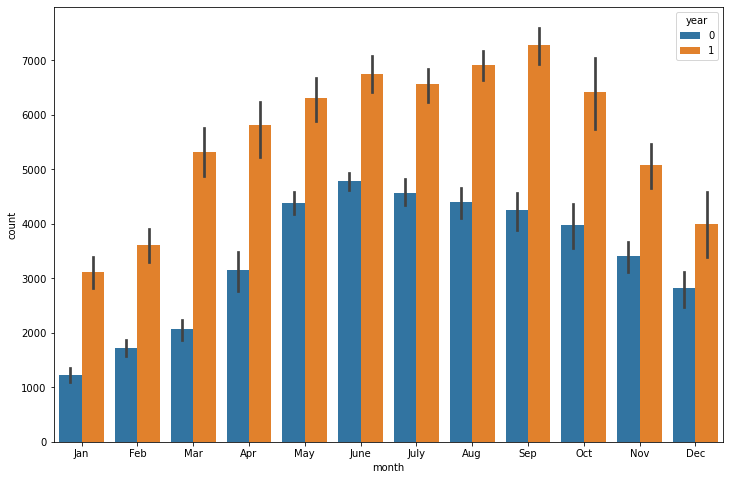

In [28]:
plt.figure(figsize=(12,8))
sns.barplot('month','count',hue='year',data=bikes)

### 6.Weekday column mapping as:
0: Sunday
1: Monday
2: Tuesday
3: Wednesday
4: Thursday
5: Friday
6: Saturday


In [29]:
codes = {0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday'}
bikes['weekday'] = bikes['weekday'].map(codes)

<AxesSubplot:xlabel='weekday'>

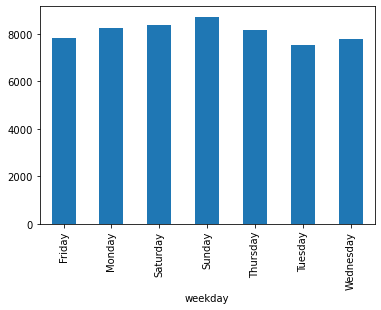

In [30]:
bikes.groupby('weekday')['count'].max().plot(kind='bar')

### 7.temp

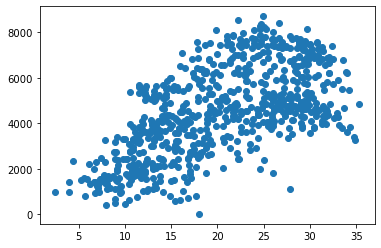

In [31]:
#7.temp
plt.scatter('temp','count',data=bikes)

### 8.Atemp

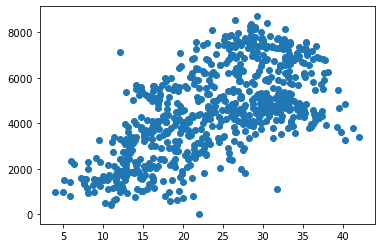

In [32]:
plt.scatter('atemp','count',data=bikes)

### 9.Humidity

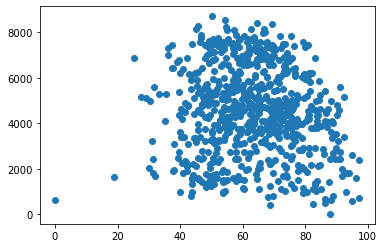

In [33]:
plt.scatter('humidity','count',data=bikes)

### 10.Windspeed

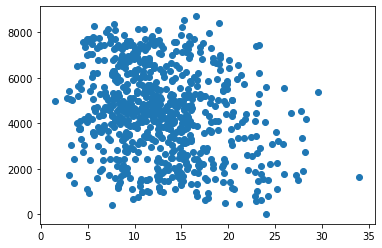

In [34]:
plt.scatter('windspeed','count',data=bikes)

<AxesSubplot:xlabel='count', ylabel='Density'>

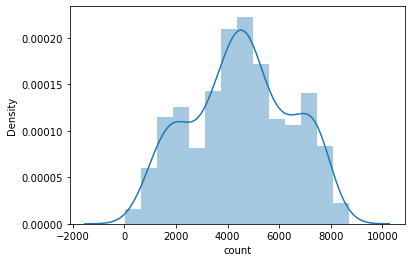

In [35]:
sns.distplot(bikes['count'])

## step3. Visualizing the Relationship among variables

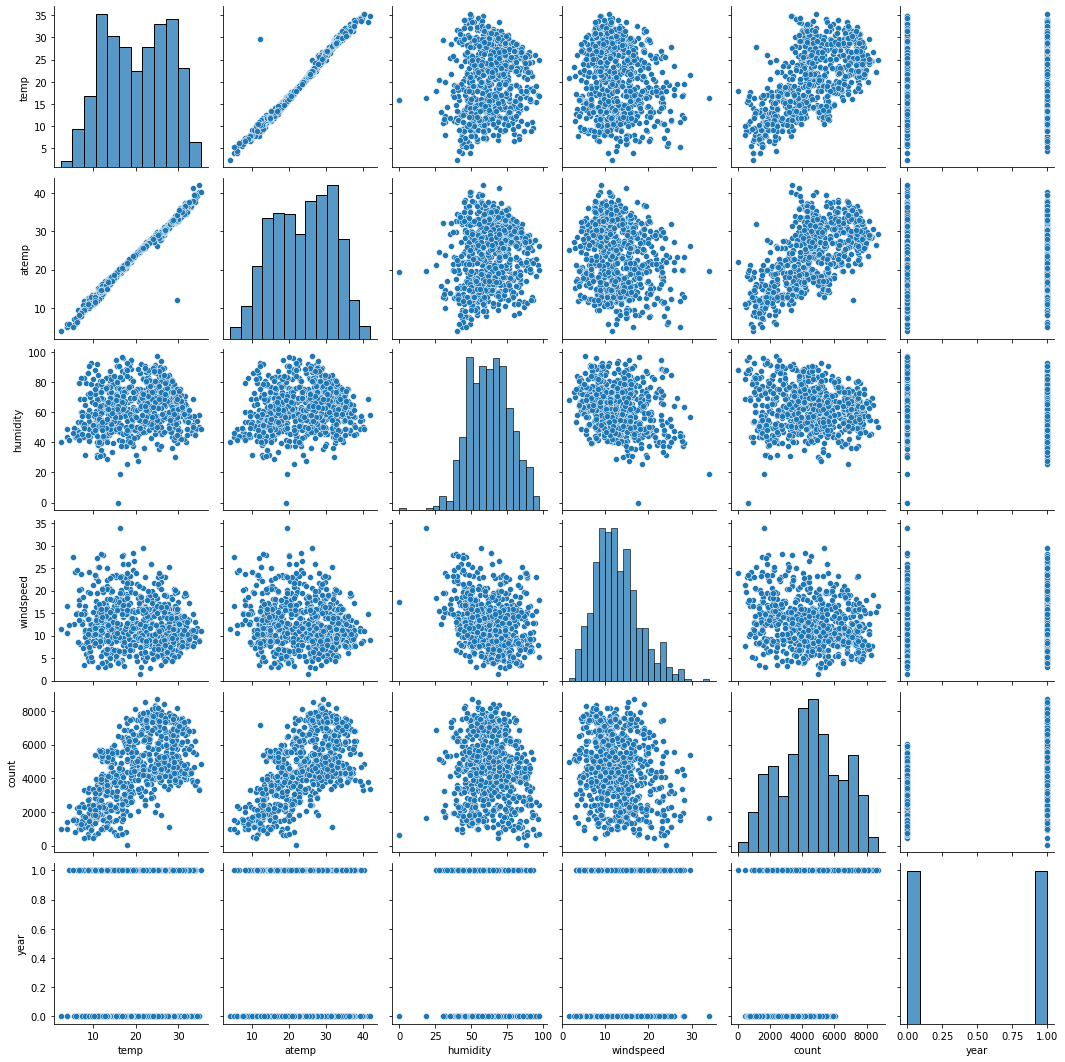

In [36]:
sns.pairplot(bikes)

<AxesSubplot:>

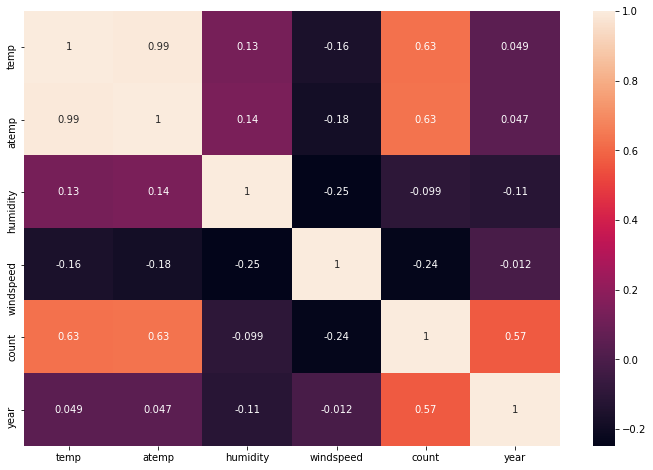

In [37]:
plt.figure(figsize = (12,8))
sns.heatmap(bikes.corr(),annot=True)

<AxesSubplot:>

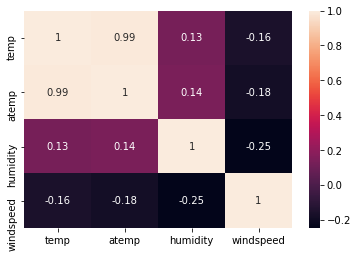

In [38]:
data= bikes[['temp','atemp','humidity','windspeed']]
sns.heatmap(data.corr(),annot=True)

###### Observation : It is seen that the variables 'temp' and 'atemp' have a high correlation value of 0.99 , ie., they are highly correlated to each other , therefore we need to drop one of them .

In [39]:
# Dropping the variable 'atemp' 
bikes.drop('atemp',axis=1,inplace=True)

In [40]:
bikes.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month
0,spring,Monday,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Tuesday,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Wednesday,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Thursday,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Friday,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan


## DATA PREPARATION :
### Step 4 : Dealing With Categorical Variables

In [41]:
seasons = pd.get_dummies(bikes['season'],drop_first=True)

working_day = pd.get_dummies(bikes['workingday'],drop_first=True)

weather= pd.get_dummies(bikes['weathersit'],drop_first=True)

month= pd.get_dummies(bikes['month'],drop_first=True)

week_day= pd.get_dummies(bikes['weekday'],drop_first=True)

In [42]:
# Add the above created dummy variables to the original bikes dataframe
bikes = pd.concat([bikes,seasons,working_day,weather,month,week_day],axis=1)

In [43]:
bikes.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,Monday,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,1,0,0,0,0,0
1,spring,Tuesday,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan,...,0,0,0,0,0,0,0,0,1,0
2,spring,Wednesday,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan,...,0,0,0,0,0,0,0,0,0,1
3,spring,Thursday,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan,...,0,0,0,0,0,0,0,1,0,0
4,spring,Friday,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Dropping the categorical variables as they are already dummy-encoded.

bikes.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [45]:
bikes.head()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Looking at the shape of dataframe after dropping the above variables
bikes.shape

(730, 28)

### Step 5: Splitting the Data into Training and Testing Sets

In [47]:
from sklearn.model_selection import train_test_split

bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [48]:
#Looking at the shape of the train dataset.
bikes_train.shape

(510, 28)

In [49]:
#Looking at the shape of the test dataset.
bikes_test.shape

(219, 28)

### Scaling the Features
For Scaling the features in our bikes dataset , we will use MinMax scaling.

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [51]:
# Applying Scaling on the continuous columns : 'windspeed' , 'temp' , 'humidity' , 'count'
vars = ['windspeed' , 'temp' , 'humidity','count']

bikes_train[vars] = scaler.fit_transform(bikes_train[vars])

bikes_train.head()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,0.509887,0.575354,0.300794,0.864243,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
576,0.815169,0.725633,0.264686,0.827658,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
426,0.442393,0.640189,0.255342,0.465255,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,0.245101,0.498067,0.663106,0.204096,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,0.395666,0.504508,0.188475,0.482973,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [52]:
y_train = bikes_train.pop('count')
X_train = bikes_train

## Data Modelling and Evaluation:


### RFE
Recursive feature elimination

In [53]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
# Running RFE with selecting 15 variables 
lm = LinearRegression()
lm.fit(X_train, y_train)

np.random.seed(0)
rfe = RFE(lm, 15)             # running RFE,15 is the number of variables we want RFE to select
rfe = rfe.fit(X_train, y_train)

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  

[('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Monday', False, 7),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 6),
 ('Wednesday', False, 9)]

In [56]:
# Looking at the cols that RFE selected
col = X_train.columns[rfe.support_]
col

Index(['temp', 'humidity', 'windspeed', 'year', 'spring', 'summer', 'winter',
       'working_day', 'Light Snow', 'Mist', 'Jan', 'July', 'Sep', 'Saturday',
       'Sunday'],
      dtype='object')

In [57]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [58]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [59]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

### Model-1

In [60]:
#Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.02e-187
Time:                        14:03:37   Log-Likelihood:                 511.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     494   BIC:                            -922.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2005      0.045      4.462      0.000       0.112       0.289
temp            0.5127      0.035     14.675      0.000       0.444       0.581
humidity       -0.1589      0.038     -4.185      0.000      -0.234      -0.084
windspeed      -0.1880      0.026     -7.263      0.000      -0.239      -0.137
year            0.2309      0.008     28.376      0.000       0.215       0.247
spring         -0.0512      0.021     -2.434      0.015      -0.092      -0.010
summer          0.0501      0.015      3.319      0.001       0.020       0.080
winter          0.0924      0.018      5.273      0.000       0.058       0.127
working_day     0.0855      0.028      3.073      0.002       0.031       0.140
Light Snow     -0.2410      0.026     -9.120      0.000      -0.293      -0.189
Mist           -0.0560      0.011     -5.291      0.000      -0.077      -0.035
Jan            -0.0330      0.018     -1.868      0.062      -0.068       0.002
July           -0.0562      0.018     -3.061      0.002      -0.092      -0.020
Sep             0.0820      0.017      4.896      0.000       0.049       0.115
Saturday        0.0991      0.030      3.347      0.001       0.041       0.157
Sunday          0.1055      0.030      3.576      0.000       0.048       0.163
==============================================================================
Omnibus:                       68.941   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.333
Skew:                          -0.734   Prob(JB):                     8.34e-34
Kurtosis:                       5.239   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### VIF (Variable Inflation Factor) Calculation

In [61]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,126.47
8,working_day,9.94
15,Sunday,6.46
14,Saturday,6.19
5,spring,5.09
1,temp,3.89
7,winter,3.59
6,summer,2.64
2,humidity,1.92
10,Mist,1.58


In [62]:
# Dropping the const variable
X_train_new = X_train_rfe.drop(["const"], axis = 1)

### Model-2

In [63]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.02e-187
Time:                        14:03:48   Log-Likelihood:                 511.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     494   BIC:                            -922.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2005      0.045      4.462      0.000       0.112       0.289
temp            0.5127      0.035     14.675      0.000       0.444       0.581
humidity       -0.1589      0.038     -4.185      0.000      -0.234      -0.084
windspeed      -0.1880      0.026     -7.263      0.000      -0.239      -0.137
year            0.2309      0.008     28.376      0.000       0.215       0.247
spring         -0.0512      0.021     -2.434      0.015      -0.092      -0.010
summer          0.0501      0.015      3.319      0.001       0.020       0.080
winter          0.0924      0.018      5.273      0.000       0.058       0.127
working_day     0.0855      0.028      3.073      0.002       0.031       0.140
Light Snow     -0.2410      0.026     -9.120      0.000      -0.293      -0.189
Mist           -0.0560      0.011     -5.291      0.000      -0.077      -0.035
Jan            -0.0330      0.018     -1.868      0.062      -0.068       0.002
July           -0.0562      0.018     -3.061      0.002      -0.092      -0.020
Sep             0.0820      0.017      4.896      0.000       0.049       0.115
Saturday        0.0991      0.030      3.347      0.001       0.041       0.157
Sunday          0.1055      0.030      3.576      0.000       0.048       0.163
==============================================================================
Omnibus:                       68.941   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.333
Skew:                          -0.734   Prob(JB):                     8.34e-34
Kurtosis:                       5.239   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,humidity,33.01
7,working_day,21.17
0,temp,20.30
4,spring,5.10
2,windspeed,4.99
14,Sunday,4.81
13,Saturday,4.64
6,winter,3.86
5,summer,3.06
9,Mist,2.33


In [65]:
# Dropping the 'humidity' variable
X_train_new = X_train_new.drop(["humidity"], axis = 1)

### Model-3

In [66]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          3.88e-185
Time:                        14:03:55   Log-Likelihood:                 502.29
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     495   BIC:                            -911.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1214      0.041      2.929      0.004       0.040       0.203
temp            0.4746      0.034     13.842      0.000       0.407       0.542
windspeed      -0.1574      0.025     -6.236      0.000      -0.207      -0.108
year            0.2348      0.008     28.582      0.000       0.219       0.251
spring         -0.0603      0.021     -2.840      0.005      -0.102      -0.019
summer          0.0437      0.015      2.860      0.004       0.014       0.074
winter          0.0773      0.017      4.434      0.000       0.043       0.112
working_day     0.0873      0.028      3.089      0.002       0.032       0.143
Light Snow     -0.2849      0.025    -11.551      0.000      -0.333      -0.236
Mist           -0.0816      0.009     -9.293      0.000      -0.099      -0.064
Jan            -0.0376      0.018     -2.099      0.036      -0.073      -0.002
July           -0.0513      0.019     -2.756      0.006      -0.088      -0.015
Sep             0.0761      0.017      4.484      0.000       0.043       0.109
Saturday        0.1038      0.030      3.449      0.001       0.045       0.163
Sunday          0.1104      0.030      3.686      0.000       0.052       0.169
==============================================================================
Omnibus:                       69.479   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.781
Skew:                          -0.745   Prob(JB):                     1.81e-33
Kurtosis:                       5.208   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,working_day,18.64
0,temp,13.71
1,windspeed,4.83
13,Sunday,4.40
3,spring,4.31
12,Saturday,4.26
5,winter,2.97
4,summer,2.79
2,year,2.07
9,Jan,1.65


In [68]:
# Dropping the 'workingday' variable
X_train_new = X_train_new.drop(["working_day"], axis = 1)

### Model-4

In [69]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          3.02e-184
Time:                        14:04:01   Log-Likelihood:                 497.42
No. Observations:                 510   AIC:                            -966.8
Df Residuals:                     496   BIC:                            -907.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2081      0.031      6.773      0.000       0.148       0.268
temp           0.4734      0.035     13.690      0.000       0.405       0.541
windspeed     -0.1575      0.025     -6.184      0.000      -0.208      -0.107
year           0.2345      0.008     28.305      0.000       0.218       0.251
spring        -0.0635      0.021     -2.966      0.003      -0.106      -0.021
summer         0.0435      0.015      2.823      0.005       0.013       0.074
winter         0.0757      0.018      4.311      0.000       0.041       0.110
Light Snow    -0.2826      0.025    -11.366      0.000      -0.331      -0.234
Mist          -0.0809      0.009     -9.138      0.000      -0.098      -0.063
Jan           -0.0383      0.018     -2.121      0.034      -0.074      -0.003
July          -0.0504      0.019     -2.688      0.007      -0.087      -0.014
Sep            0.0726      0.017      4.252      0.000       0.039       0.106
Saturday       0.0189      0.012      1.529      0.127      -0.005       0.043
Sunday         0.0256      0.012      2.117      0.035       0.002       0.049
==============================================================================
Omnibus:                       78.357   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.549
Skew:                          -0.805   Prob(JB):                     1.39e-40
Kurtosis:                       5.459   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.26
1,windspeed,4.62
3,spring,2.76
4,summer,2.23
2,year,2.07
5,winter,1.78
8,Jan,1.61
9,July,1.59
7,Mist,1.57
10,Sep,1.33


In [73]:
# Dropping the 'Jan' variable
X_train_new = X_train_new.drop(["Jan"], axis = 1)

### Model-5

In [74]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          3.87e-185
Time:                        14:04:53   Log-Likelihood:                 493.95
No. Observations:                 510   AIC:                            -963.9
Df Residuals:                     498   BIC:                            -913.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1943      0.030      6.500      0.000       0.136       0.253
temp           0.4935      0.034     14.706      0.000       0.428       0.559
windspeed     -0.1510      0.025     -5.950      0.000      -0.201      -0.101
year           0.2336      0.008     28.086      0.000       0.217       0.250
spring        -0.0687      0.021     -3.217      0.001      -0.111      -0.027
summer         0.0464      0.015      3.015      0.003       0.016       0.077
winter         0.0815      0.017      4.681      0.000       0.047       0.116
Light Snow    -0.2798      0.025    -11.210      0.000      -0.329      -0.231
Mist          -0.0811      0.009     -9.144      0.000      -0.099      -0.064
July          -0.0524      0.019     -2.782      0.006      -0.089      -0.015
Sep            0.0731      0.017      4.260      0.000       0.039       0.107
Sunday         0.0233      0.012      1.937      0.053      -0.000       0.047
==============================================================================
Omnibus:                       75.491   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.508
Skew:                          -0.774   Prob(JB):                     1.73e-39
Kurtosis:                       5.450   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.12
1,windspeed,4.60
4,summer,2.21
2,year,2.07
3,spring,2.07
5,winter,1.78
8,July,1.59
7,Mist,1.55
9,Sep,1.33
10,Sunday,1.17


In [76]:
# Dropping the 'Sep' variable
X_train_new = X_train_new.drop(["Sep"], axis = 1)


### Model-6

In [77]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.76e-182
Time:                        14:05:08   Log-Likelihood:                 484.82
No. Observations:                 510   AIC:                            -947.6
Df Residuals:                     499   BIC:                            -901.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2214      0.030      7.452      0.000       0.163       0.280
temp           0.4911      0.034     14.390      0.000       0.424       0.558
windspeed     -0.1556      0.026     -6.034      0.000      -0.206      -0.105
year           0.2333      0.008     27.578      0.000       0.217       0.250
spring        -0.0940      0.021     -4.506      0.000      -0.135      -0.053
summer         0.0217      0.015      1.498      0.135      -0.007       0.050
winter         0.0612      0.017      3.591      0.000       0.028       0.095
Light Snow    -0.2748      0.025    -10.839      0.000      -0.325      -0.225
Mist          -0.0791      0.009     -8.781      0.000      -0.097      -0.061
July          -0.0765      0.018     -4.181      0.000      -0.112      -0.041
Sunday         0.0235      0.012      1.919      0.056      -0.001       0.047
==============================================================================
Omnibus:                       70.867   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.641
Skew:                          -0.716   Prob(JB):                     1.19e-38
Kurtosis:                       5.484   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.60
0,temp,4.43
2,year,2.07
3,spring,2.00
4,summer,1.99
5,winter,1.72
7,Mist,1.54
8,July,1.46
9,Sunday,1.17
6,Light Snow,1.08


In [79]:
# Dropping the 'summer' variable
X_train_new = X_train_new.drop(["summer"], axis = 1)

### Model-7

In [80]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          3.22e-183
Time:                        14:05:17   Log-Likelihood:                 483.68
No. Observations:                 510   AIC:                            -947.4
Df Residuals:                     500   BIC:                            -905.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2467      0.024     10.092      0.000       0.199       0.295
temp           0.4690      0.031     15.217      0.000       0.408       0.530
windspeed     -0.1503      0.026     -5.878      0.000      -0.201      -0.100
year           0.2337      0.008     27.604      0.000       0.217       0.250
spring        -0.1148      0.016     -7.387      0.000      -0.145      -0.084
winter         0.0441      0.013      3.481      0.001       0.019       0.069
Light Snow    -0.2762      0.025    -10.890      0.000      -0.326      -0.226
Mist          -0.0791      0.009     -8.773      0.000      -0.097      -0.061
July          -0.0843      0.018     -4.804      0.000      -0.119      -0.050
Sunday         0.0229      0.012      1.874      0.062      -0.001       0.047
==============================================================================
Omnibus:                       71.131   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.692
Skew:                          -0.718   Prob(JB):                     7.06e-39
Kurtosis:                       5.492   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.23
1,windspeed,3.96
2,year,2.06
3,spring,1.64
6,Mist,1.52
4,winter,1.38
7,July,1.31
8,Sunday,1.17
5,Light Snow,1.08


##### From the above model ,we see that the Pvalues of all the 9 variables are very low(approx equal to 0) and VIF values are also less than 5 , which is acceptable.

### F-Statistics
F-Statistics is used for testing the overall significance of the Model.

High value for the F-Statistics means the model is more significant and vice-versa.

`F-statistic: 262.8
`Prob (F-statistic): 3.22e-193

### our final model with :
* R-squared for training set : 0.825 ( 82.5 %)
* Adj R-squared for training set: 0.822 ( 82.2 %)

### Residual Analysis of the training set
Now we will try to check one of the major assumptions of the linear regression ie., checking whether the error terms are normally distributed by plotting a histogram of the error terms and see what it looks like.

In [85]:
y_train_count = lm.predict(X_train_lm)


Text(0.5, 0, 'Errors')

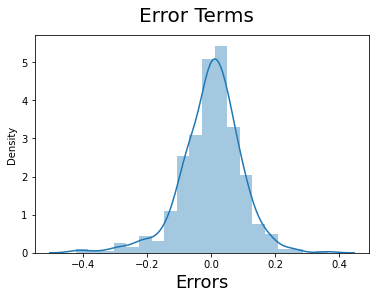

In [86]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18) 

###### Since the errors terms are normally distributed with mean=0, thus our assumption is satisfied in our model.



## Making Predictions
Applying the scaling on the test set also

In [87]:
# Applying Scaling on the continuous columns : 'windspeed' , 'temp' , 'humidity'
vars = ['windspeed' , 'temp' , 'humidity','count']

bikes_test[vars] = scaler.transform(bikes_test[vars])

In [88]:
y_test = bikes_test.pop('count')
X_test = bikes_test

In [89]:
# Using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [90]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

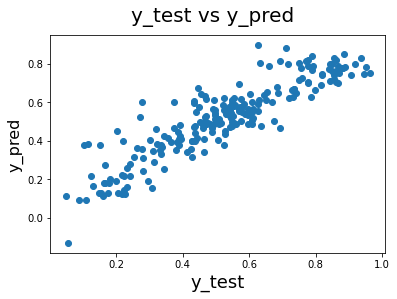

In [98]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

#### Calculating R-squared value for Test set

In [94]:
from sklearn.metrics import r2_score

r2=r2_score(y_test, y_pred)
r2

0.8041150453586843

#### Calculating Adj. R-squared value for Test set

In [95]:
n = X_test_new.shape[0]      # n is number of rows in X_test_new

p = X_test_new.shape[1]     # p= Number of features/predictors which is number of columns in X_test_new

# Calculating Adjusted R-squared value using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7956798080774793

In [97]:
# calculating the Mean Squared Error , Root Mean Squared Error and Mean Absolute error
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.07291789816802845
MSE: 0.009303714225170888
RMSE: 0.09645576304799464


### Comparison between the results on Train and Test datasets:

#### -R-squared Value:
##### Train set : 82.5%
##### Test set  : 80.4%

#### -Adj R-squared Value:
##### Train set : 82.2%
##### Test set  : 79.5%

-The difference between the R-squared value for the train and test dataset is not more than 5%.So that this is a good model.
-The difference between the Adj R-squared value for the train and test dataset is not more than 5%.So that this is a good      model.

## Reporting the Final Model:
From the coefficients that we get for the variables, our linear regression equation becomes:

Count = 0.2467 + 0.4911 X temp - 0.1556 X windspeed + 0.2333 X year - 0.0940 X spring - 0.0791 X mist + 0.0612 X winter - 0.0765  X July + 0.0235 X Sunday - 0.2748 X Light Snow

### From the regression model above , we have the following variables and their coefficients which are significant in predicting the demand for shared bikes:

##### temp       = 0.4911
##### windspeed  = -0.1556
##### year       = 0.2333
##### July       = -0.0765
##### spring     = -0.0940
##### winter     = 0.0612
##### mist       = -0.0791
##### Sunday     = 0.0235
##### Light Snow = -0.0794


### Conclusion:
#### The three most significant variables affecting the demand for shared bikes are :

##### 1.temperature
##### 2.year
##### 3.Sunday
##### 4.Winter

###### as these features are having positive coefficients and an increase in them is going to result into an increase in the demand for shared bikes.